In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout


In [2]:
# Step 2: Load IMDb dataset
max_words = 10000  # use top 10,000 words
max_len = 200      # max review length

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Step 3: Pad sequences to make all reviews the same length
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)


In [4]:
# Step 4: Build LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  # Replace with GRU(128, ...) for GRU
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Step 5: Train the model
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 196s 609ms/step - accuracy: 0.6920 - loss: 0.5661 - val_accuracy: 0.8494 - val_loss: 0.3616
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 190s 606ms/step - accuracy: 0.8492 - loss: 0.3674 - val_accuracy: 0.8424 - val_loss: 0.3737
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 186s 595ms/step - accuracy: 0.8829 - loss: 0.2919 - val_accuracy: 0.8156 - val_loss: 0.4086
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 203s 598ms/step - accuracy: 0.9025 - loss: 0.2478 - val_accuracy: 0.8476 - val_loss: 0.3632
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 203s 603ms/step - accuracy: 0.8410 - loss: 0.3739 - val_accuracy: 0.8468 - val_loss: 0.4047


In [6]:
# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.8472 - loss: 0.4104
Test Accuracy: 84.89%


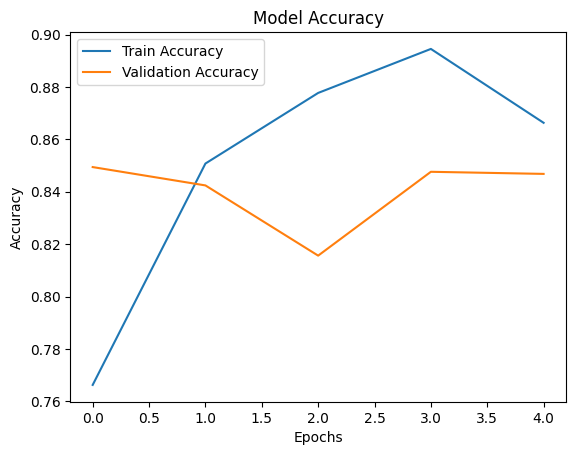

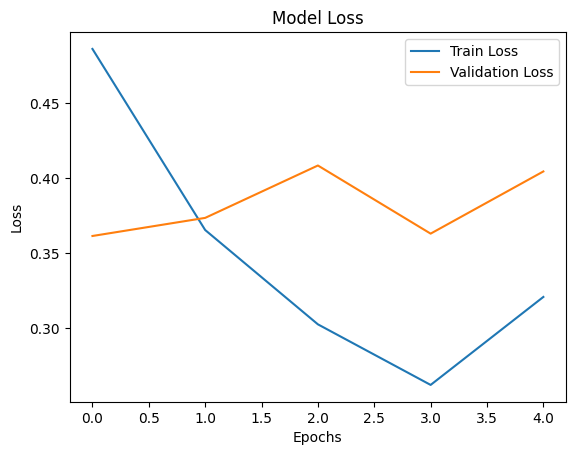

In [7]:
# Step 7: Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
# Step 8: Make predictions
sample_reviews = [
    "This movie was fantastic! I really enjoyed it.",
    "I hated this film. It was terrible and boring."
]

# Tokenizer is built-in in IMDb dataset: use the same word index
word_index = imdb.get_word_index()
def encode_review(text):
    tokens = [word_index.get(word.lower(), 2) for word in text.split()]  # 2 = unknown word
    return pad_sequences([tokens], maxlen=max_len)

for review in sample_reviews:
    encoded = encode_review(review)
    pred = model.predict(encoded)[0][0]
    sentiment = "Positive" if pred > 0.5 else "Negative"
    print(f"Review: {review}\nSentiment: {sentiment}\n")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
Review: This movie was fantastic! I really enjoyed it.
Sentiment: Positive

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Review: I hated this film. It was terrible and boring.
Sentiment: Positive

